In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

### Plotnine's ggplot

`ggplot` is a library mostly used for plotting in R, but `plotnine` provides a very nice port to Python. It is built on top of Matplotlib and provides pretty default styles and color palettes to make statistical plots more attractive.
 
We will go through some different types of plots, and show you how to customise those to your heart's content!

##### 0. Importing plotnine


In [2]:
import plotnine as gg
from plotnine import ggplot

Alright, now we only need some data:

In [3]:
participants = pd.read_csv('participants.csv')
trials = pd.read_csv('trials.csv')

merged = trials.merge(participants, on='id')
merged

,trial_order,id,condition,correct,RT,first_name,last_name,age,gender,group
0,0,11160,condition_b,True,142.422819,Megan,Roth,25,man,x
1,1,11160,baseline,False,271.165422,Megan,Roth,25,man,x
2,2,11160,condition_b,True,213.069725,Megan,Roth,25,man,x
3,3,11160,condition_b,True,315.879346,Megan,Roth,25,man,x
4,4,11160,baseline,True,312.056268,Megan,Roth,25,man,x
...,...,...,...,...,...,...,...,...,...,...
3835,115,30568,baseline,True,374.257546,Tiffany,Alexander,22,woman,x
3836,116,30568,condition_b,True,107.262827,Tiffany,Alexander,22,woman,x
3837,117,30568,condition_a,True,332.172719,Tiffany,Alexander,22,woman,x
3838,118,30568,baseline,True,227.775358,Tiffany,Alexander,22,woman,x


<font color='green'>**Exercise 0:**</font> can you filter out the incorrect trials? Later on, you can add them back in to see whether you can make some interesting plots with them.

In [4]:
merged = merged[merged.correct !=False]

##### 1. Different geoms in ggplot

In `ggplot`, different types of visual elements are called `geoms` -- and they are the building blocks of our plots! Let's explore a few of them.

For instance, let's make a quick dotplot using `geom_point`:

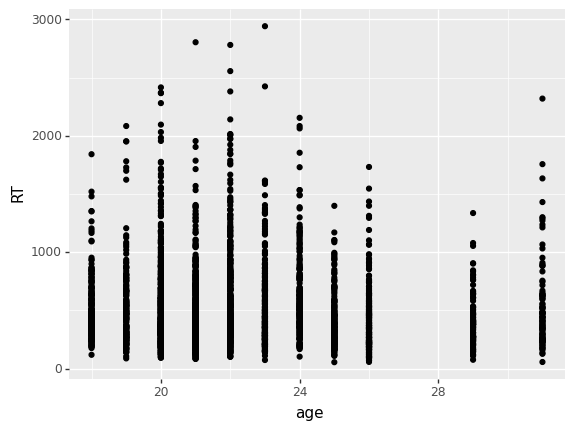

In [6]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='age', y='RT') +
    gg.geom_point()
)
plot.draw()
plt.show()

<font color='green'>**Exercise 1:**</font> can you add a `line` through this data? Perhaps even a `smooth` line? And can you `color` the points and/or lines according to their `condition`, by changing the `aes`thetic?

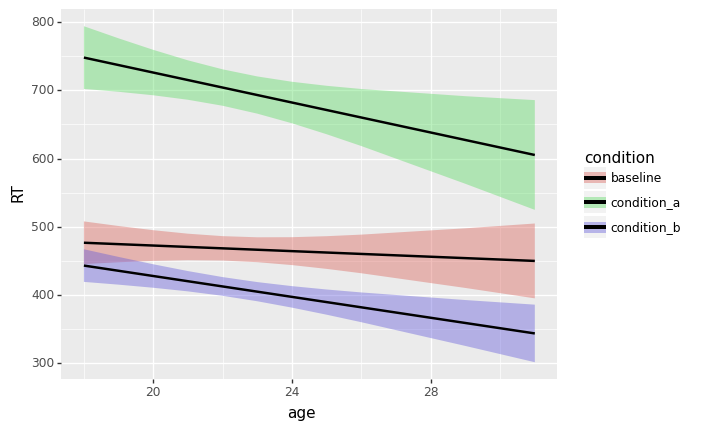

In [21]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='age', y='RT', fill="condition") +
    #gg.geom_point()
    gg.geom_smooth()
)
plot.draw()
plt.show()

Now, how about a boxplot?

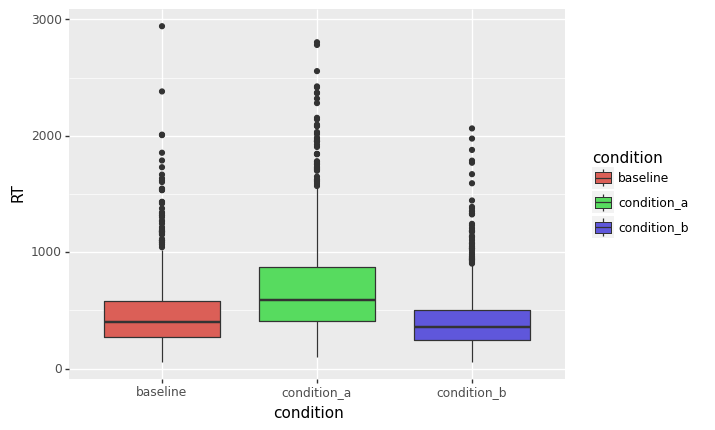

In [13]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='condition', y='RT') +
    gg.geom_boxplot(gg.aes(fill='condition'))
)
plot.draw()
plt.show()

<font color='green'>**Exercise 2:**</font> can you make a `violin` plot of the conditions? And then, on top of that, can you draw all points? Perhaps you could even `jitter` them, so they don't all lie on the same vertical line?

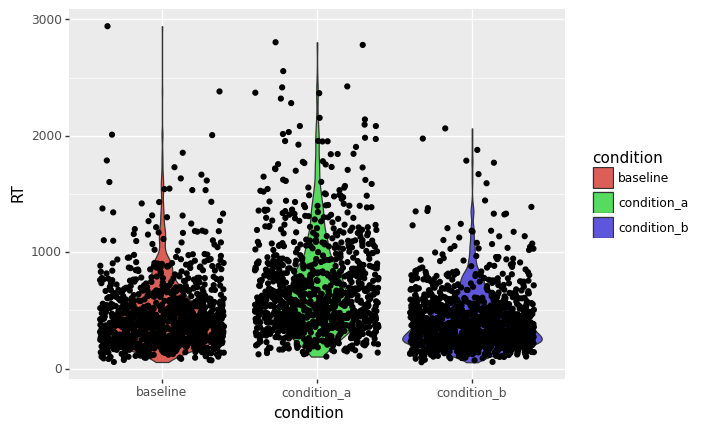

In [17]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='condition', y='RT') +
    gg.geom_violin(gg.aes(fill='condition')) +
    gg.geom_jitter()
)
plot.draw()
plt.show()

##### 2. Different facets of the same data

In `ggplot`, you can use facets to split up the data into different groups. For instance:

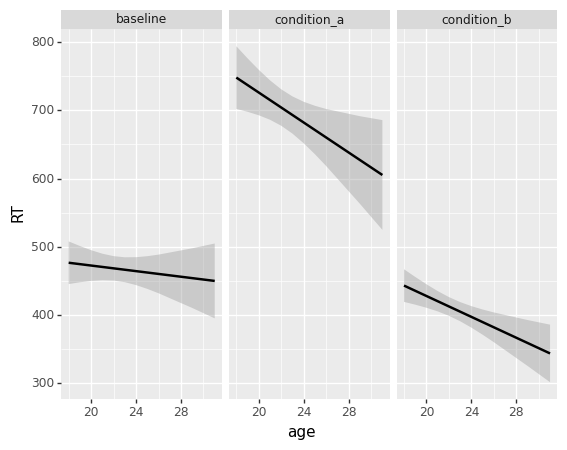

In [19]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='age', y='RT') +
    gg.geom_smooth() +
    gg.facet_wrap('condition')
)
plot.draw()
plt.show()

<font color='green'>**Exercise 3:**</font> can you extend this plot, so that it forms a `grid` with `condition`s as columns and `group`s as rows?

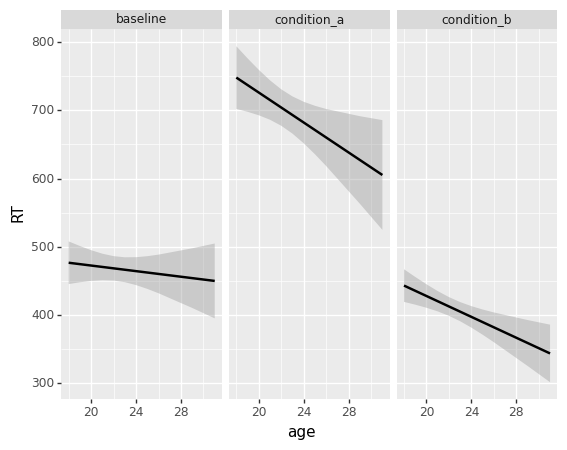

In [24]:
#DEZE SNAP IK NIET
plot = (
    ggplot(data=merged) +
    gg.aes(x='age', y='RT') +
    gg.geom_smooth() +
    gg.facet_wrap('condition')
)
plot.draw()
plt.show()

##### 3. Some basic cleaning

Once your data looks nice, you might want to still pay attention to the axes and labels on your plot. Let's see how we do that using `ggplot`!

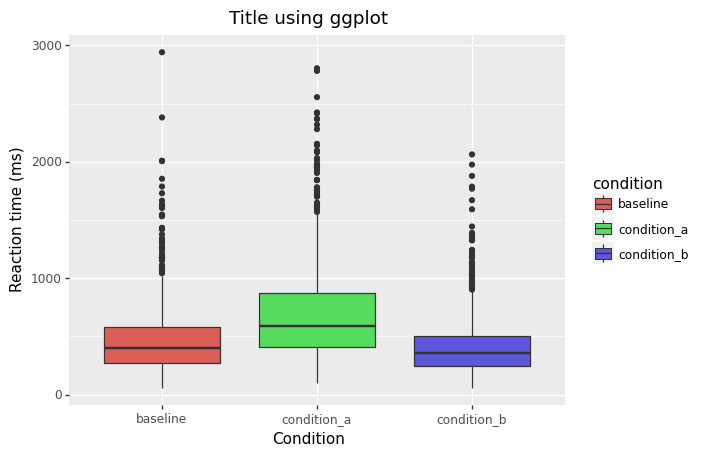

In [26]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='condition', y='RT') +
    gg.geom_boxplot(gg.aes(fill='condition')) +
    gg.labs(title='Title using ggplot', x='Condition', y='Reaction time (ms)')
)
plot.draw()
plt.show()

You can also remove the legend, since it's redundant here anyway:

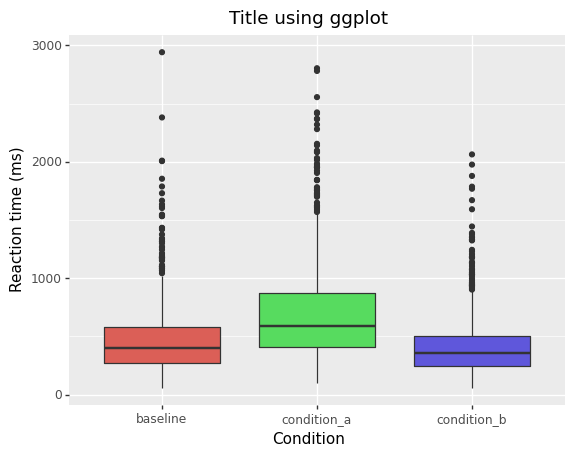

In [28]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='condition', y='RT') +
    gg.geom_boxplot(gg.aes(fill='condition')) +
    gg.labs(title='Title using ggplot', x='Condition', y='Reaction time (ms)') +
    gg.guides(fill=False)
)
plot.draw()
plt.show()

<font color='green'>**Exercise 4:**</font> can you figure out how to `lim`it the reaction time axis, so that it only shows values between 200 and 1000?

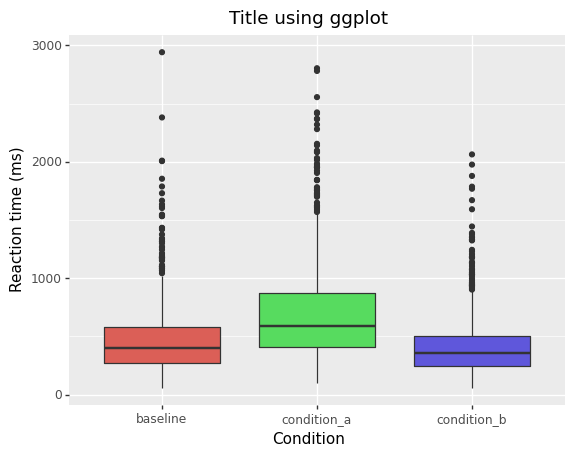

In [35]:
plot = (
    ggplot(data=merged) +
    gg.aes(x='condition', y='RT') +
    gg.geom_boxplot(gg.aes(fill='condition')) +
    gg.labs(title='Title using ggplot', x='Condition', y='Reaction time (ms)') +
    gg.guides(fill=False)    
    #ylim(200,1000)
)
plot.draw()
plt.show()

##### 4. Saving plots

Of course, once you're done, you may want to export your plots! Luckily, this is very easy in `plotnine`:

In [ ]:
plot.save('plot.pdf', width=8, height=6, units='cm')

##### And more!

This should give you some handles to get started with `ggplot` in Python. If you have time left, you can try one of the following exercises:

- <font color='green'>**Exercise 5:**</font> can you make your plots prettier? For instance, you can try to use a different `theme` or `palette` for your plots. You can also try to use `scale_x_continuous` and `scale_y_continuous` to change the axis labels.
- <font color='green'>**Exercise 6:**</font> can you make a `heatmap` of the reaction times, with `condition`s as columns and `group`s as rows? You can use `stat_summary` to calculate the mean, and `geom_tile` to draw the heatmap.
- <font color='green'>**Exercise 7:**</font> go back to include the incorrect trials in your data. Can you make a stacked barplot of the number of correct and incorrect trials per `condition` and `group`? You can use `geom_bar` to draw the bars, and `position_stack` to stack them.